# Problem Statement

To predict future ODI cricket match winner based on previous year's match result.

# Introduction

- Cricket is one of the most popular sports in world, especially in India. The game is highly uncertain.
- It is the sport which generate high revenue.
- What if the winner team of the match can be predicted before the match, even have begin?
- Because we are predicting a output which is categorical value, that is the probelm is a classification problem.

## Dataset Desciption

The dataset folder contains the following file:

ODI-data-1971-2017.csv = 3932 rows x 7 columns

Columns Provided in the Dataset

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date

ODI-data-2017-2021.csv = 495 x 8 columns

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date
8. Unnamed: 0

# For this problem we will be using samples from 2010 to 2021.

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the datasets ODI_data_1971_2017 and ODI_data_2017_2021
d1 = pd.read_csv("/content/ODI-data-1971-2017.csv")
d2 = pd.read_csv("/content/ODI-Data-2017-2021.csv")
d2 = d2.drop(columns = d2.columns[0], axis=1)

In [ ]:
# ODI_data_1971_2017 data
d1

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [ ]:
# ODI_data_2017_2021 data
d2

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 3817,Australia,Pakistan,Australia,92 runs,Brisbane,"Jan 13, 2017"
1,ODI # 3818,Australia,Pakistan,Pakistan,6 wickets,Melbourne,"Jan 15, 2017"
2,ODI # 3819,India,England,India,3 wickets,Pune,"Jan 15, 2017"
3,ODI # 3820,Australia,Pakistan,Australia,7 wickets,Perth,"Jan 19, 2017"
4,ODI # 3821,India,England,India,15 runs,Cuttack,"Jan 19, 2017"
...,...,...,...,...,...,...,...
490,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
491,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
492,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
493,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


Droping rows of year 2017 pesent in ODI 2017 to 2021 dataset wich are alredy present in ODI 1971 to 2017 data

In [ ]:
# filtering rows 
d3 = d2[~(d2['Match Date'].str.contains(pat = '2017'))]


In [ ]:
d3

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
129,ODI # 3946,New Zealand,Pakistan,New Zealand,61 runs,Wellington,"Jan 6, 2018"
130,ODI # 3947,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,"Jan 9, 2018"
131,ODI # 3948,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,"Jan 11, 2018"
132,ODI # 3949,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,"Jan 13, 2018"
133,ODI # 3950,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,"Jan 13, 2018"
...,...,...,...,...,...,...,...
490,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
491,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
492,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
493,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [ ]:
# Load ODI_data_1971_2021 the dataset
d4 = pd.concat([d1,d3]).reset_index(drop =True)

In [ ]:
# ODI_data_1971_2021 data
d4

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
4293,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
4294,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
4295,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
4296,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [ ]:
# Drop values from 0 to 2936 as it all conten samples of before year 2010
# Store all remaining smaple in new dataframe
df1 = pd.DataFrame(data = d4[d4.index > 2935]).reset_index(drop=True)

In [ ]:
df1

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1357,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1358,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1359,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1360,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


# Basic EDA

## Identifying the number of features or columns

## Knows more about the data in the columns like data type it contains and total samples of each

In [ ]:
# Check info of complete dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   1362 non-null   object
 1   Team 1      1362 non-null   object
 2   Team 2      1362 non-null   object
 3   Winner      1362 non-null   object
 4   Margin      1313 non-null   object
 5   Ground      1362 non-null   object
 6   Match Date  1362 non-null   object
dtypes: object(7)
memory usage: 74.6+ KB


After checking the Dtypes of all the columns 
  1. object - String values
  3. All the columns are of string datatype

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [ ]:
df1.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,1362,1362,1362,1362,1313,1362,1362
unique,1362,23,23,25,211,124,1138
top,ODI # 2937,England,Pakistan,India,6 wickets,Dhaka,"Jul 10, 2010"
freq,1,141,175,162,125,87,4


## Get unique values

In [ ]:
df1.nunique()

Scorecard     1362
Team 1          23
Team 2          23
Winner          25
Margin         211
Ground         124
Match Date    1138
dtype: int64

## Counting the total number of missing values

In [ ]:
df1.isna().sum()

Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

By the observation gather from the df1.info() , we can know there are missing values in the "Margin" column of dataset

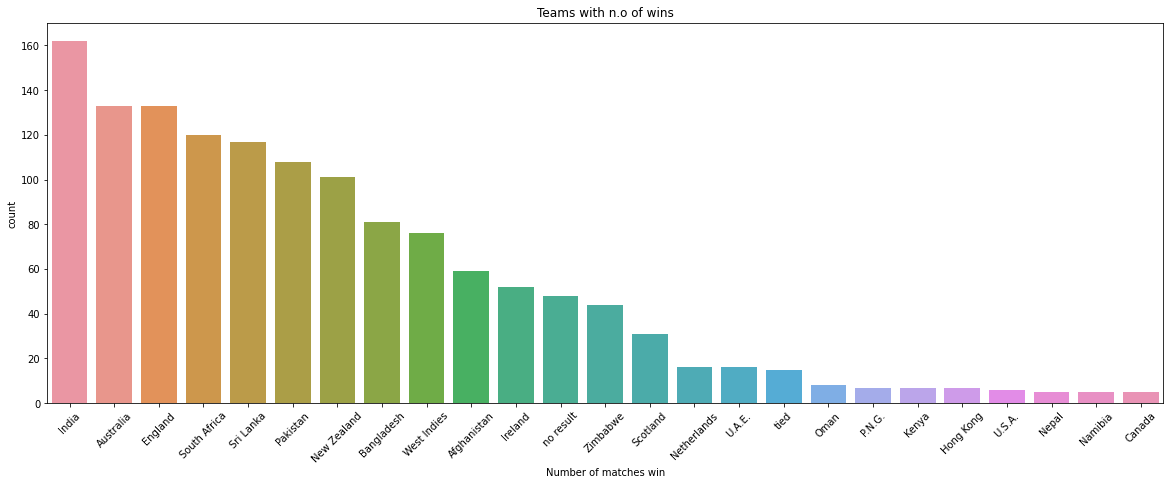

In [ ]:

plt.figure(figsize=(20,7))
large_to_small = df1.groupby('Winner').size().sort_values().index[::-1]
sns.countplot(x = 'Winner',data = df1, order = large_to_small)
plt.xticks(rotation = 45)
plt.xlabel('Number of matches win')
plt.title("Teams with n.o of wins")
plt.show()

from above graph:
1. India Won most number of matches
2. U.S.A, Nepal, Namibia, Canada wins least matches

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


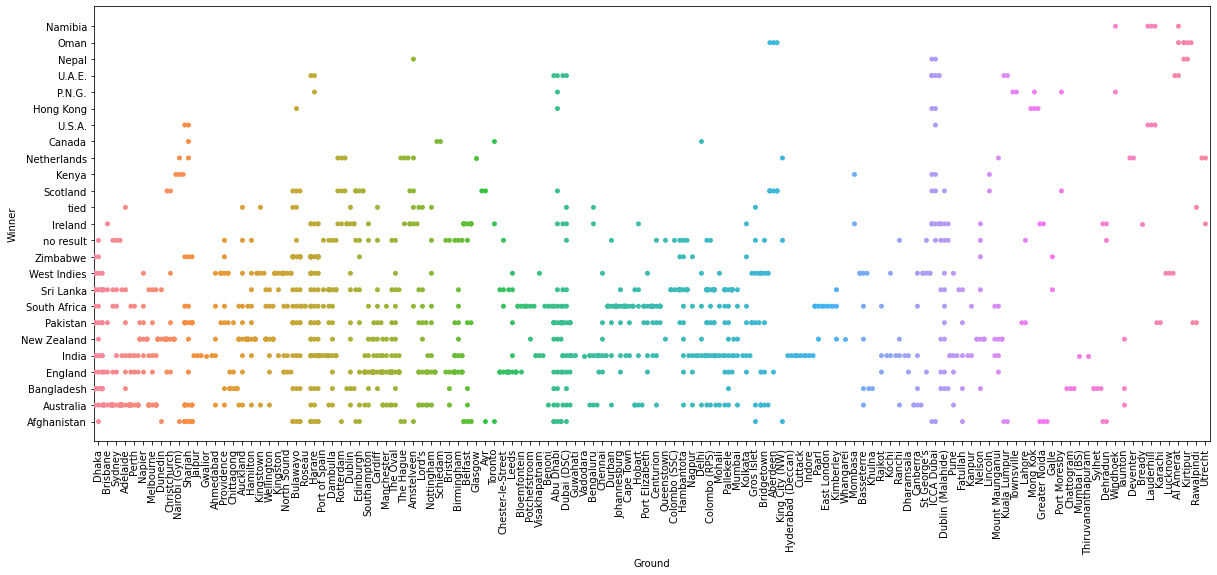

In [ ]:
# swarm plot between Winner and Ground column
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (20,8))
sns.swarmplot(y = 'Winner', x = 'Ground', data = df1)
plt.xticks(rotation = 90)
plt.show()

From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

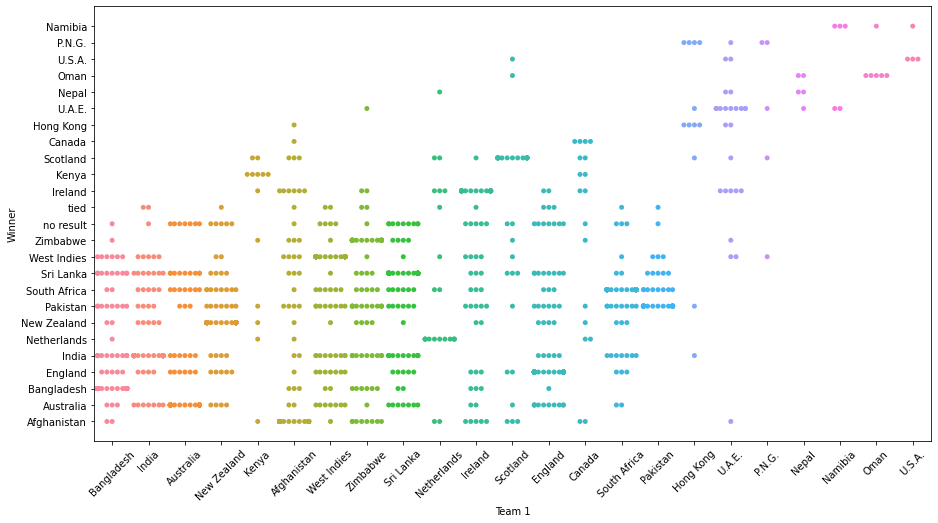

In [ ]:

plt.figure(figsize = (15,8))
sns.swarmplot(y = 'Winner', x = 'Team 1', data = df1)
plt.xticks(rotation = 45)
plt.show()

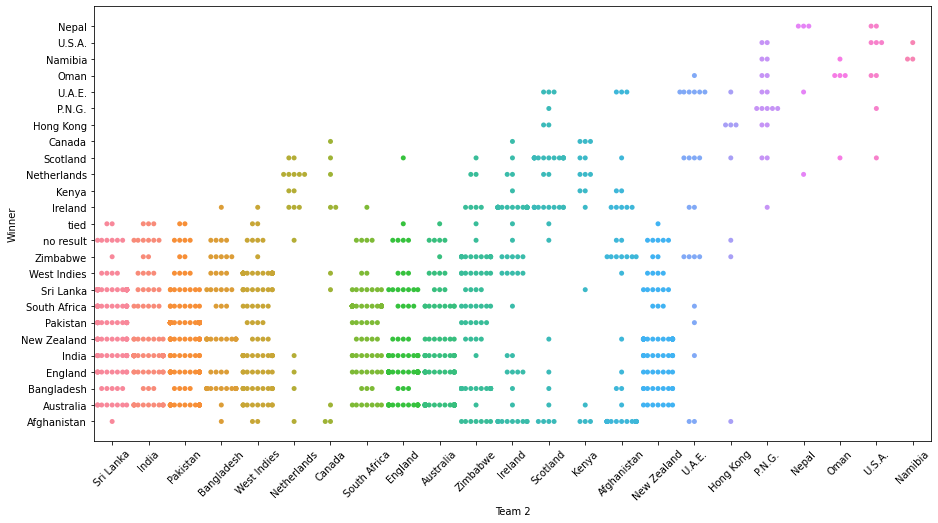

In [ ]:

plt.figure(figsize = (15,8))
sns.swarmplot(y = 'Winner', x = 'Team 2', data = df1)
plt.xticks(rotation = 45)
plt.show()

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.

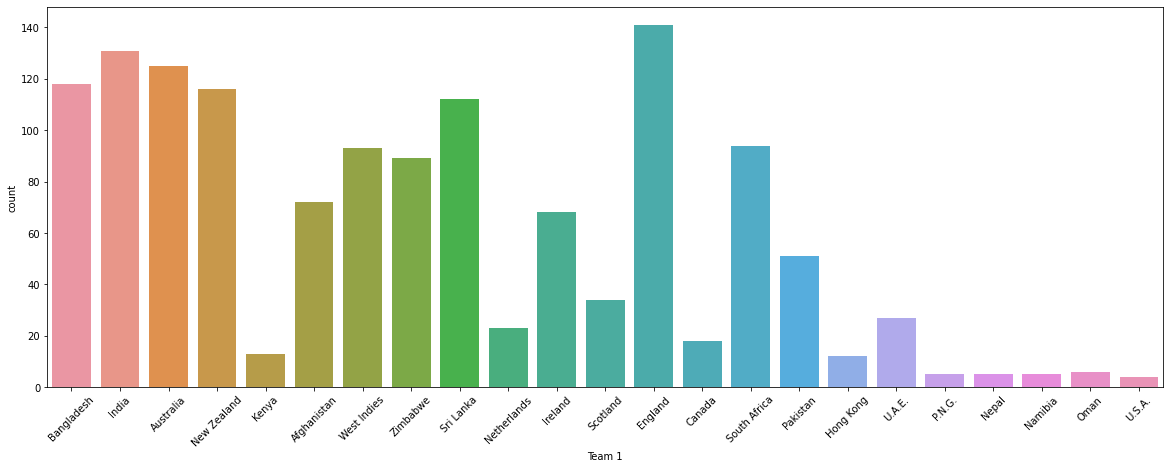

In [ ]:
# count plot for Team 1 column
plt.figure(figsize = (20,7))

sns.countplot(df1['Team 1'])
plt.xticks(rotation = 45)
plt.show()

From above count plot

distribution of values of Team 1 is not equal over complete dataset, skewed left multimodel.

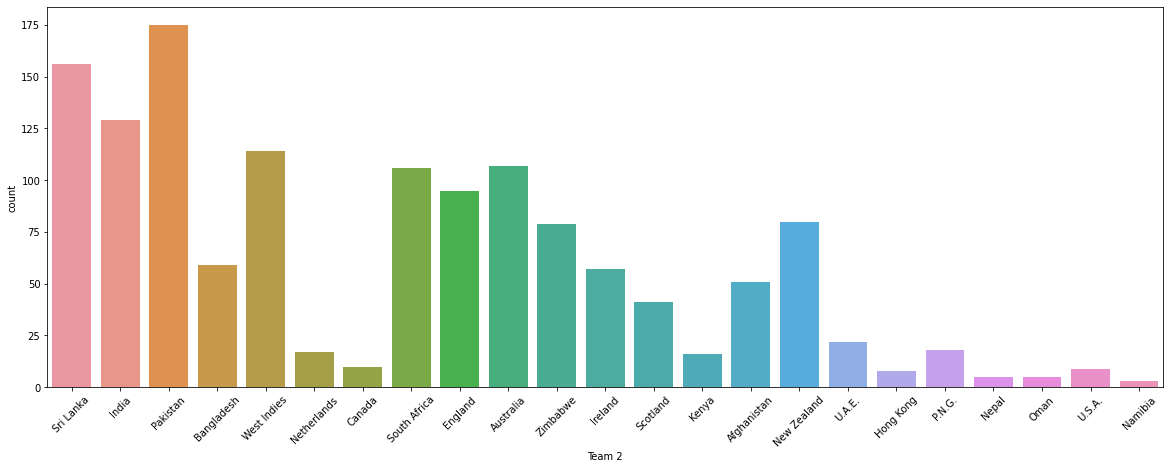

In [ ]:
# count plot for Team 2 column
plt.figure(figsize = (20,7))

sns.countplot(df1['Team 2'])
plt.xticks(rotation = 45)
plt.show()

From above count plot

distribution of values of team 2 is not equal over complete dataset, skewed left.

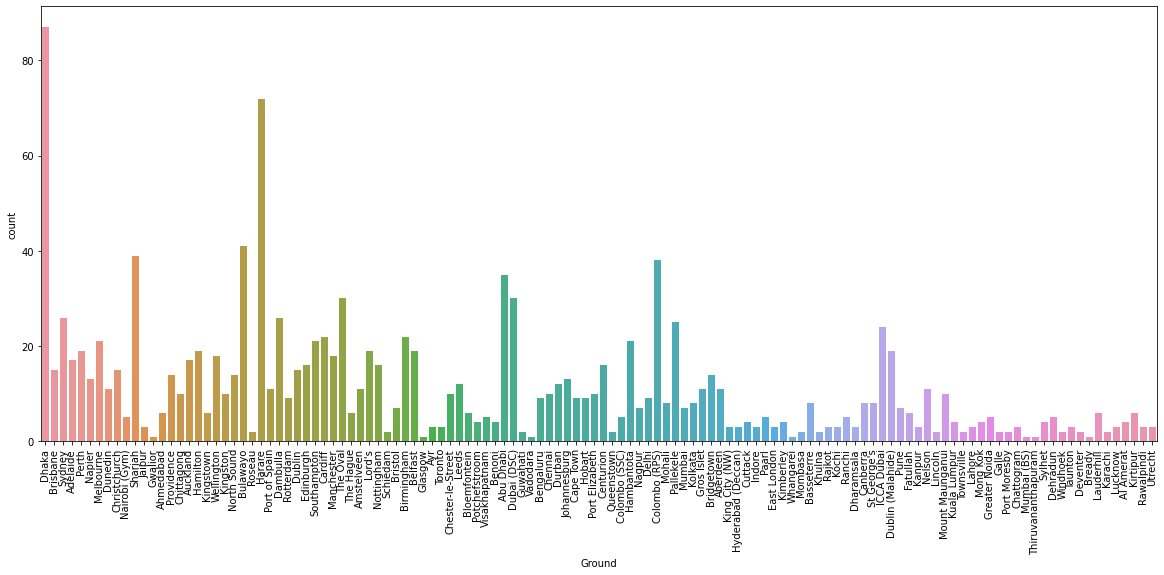

In [ ]:
# count plot for Ground column

plt.figure(figsize = (20,8))
sns.countplot(df1.Ground)
plt.xticks(rotation = 90)
plt.show()

From above count plot

distribution of values of ground is not equal over complete dataset, multimodel.

## Since, there are missing values in Margin column of dataset

We need to drop those empty columns. Beacase all of the data is categorical and if we replace the missing values with random values it will affect the correctness of prediction.

In [ ]:
# Droping rows with missing values
df1.dropna(inplace = True)

df1.isna().sum()

Scorecard     0
Team 1        0
Team 2        0
Winner        0
Margin        0
Ground        0
Match Date    0
dtype: int64

In [ ]:
df1 = df1.reset_index(drop = True)
df1

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1308,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1309,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1310,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1311,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [ ]:
df1.nunique()

Scorecard     1313
Team 1          23
Team 2          23
Winner          25
Margin         211
Ground         124
Match Date    1099
dtype: int64

In [ ]:
df1.Winner.value_counts()

India           162
Australia       133
England         133
South Africa    120
Sri Lanka       117
Pakistan        108
New Zealand     101
Bangladesh       81
West Indies      76
Afghanistan      59
Ireland          52
Zimbabwe         44
Scotland         31
U.A.E.           16
Netherlands      16
no result        10
Oman              8
Kenya             7
P.N.G.            7
Hong Kong         7
U.S.A.            6
Canada            5
Nepal             5
Namibia           5
tied              4
Name: Winner, dtype: int64

In [ ]:
# Filtering out the rows which contain winner column values as 'no result' and 'tied'
df1 = df1[(df1.Winner != 'tied' ) & (df1.Winner != 'no result')]
# Rest index of the datframe
df1 = df1.reset_index(drop = True)
df1

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1294,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1295,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1296,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1297,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


## Feature Engineering
It is one of the most important step in workflow of machine learning. Machine learning model work well if the data provided to the model is relevant and useful.

We can break down the
Margin column which is Object data type into two columns named Won by runs and won by wickets both are numerical datatype int64


In [ ]:
# Create a list for storing runs
runs = []
# Create a list for storing wickets
wickets = []
# looping through dataset column Margin
for i in df1.Margin:

  # Splitting the string data by space and making a list
  a = i.split(' ')
  
  # Exceptin handling
  try :
    # Search for index of "run" in string, after success the index of "run" will be stored in index variable 
    index = a.index('run')
    # Appending the the first element from splitted data after converting to integer to won by run list created before looping 
    runs.append(int(a[index-1]))
    # Appending the the 0 from splitted data to won by wicket list created before looping 
    wickets.append(0)

    # After fail --> print("-")
  except:
    pass

  # Exceptin handling
  try:
    # Search for index of "runs" in string, after success the index of "runs" will be stored in index variable 
    index = a.index('runs')

    # Appending the the first element from splitted data after converting to integer to won by run list created before looping 
    runs.append(int(a[index-1]))
    # Appending the the 0 from splitted data to won by wicket list created before looping 
    wickets.append(0)

    # After fail --> print("-")
  except:
    pass

  # Exceptin handling
  try:
    # Search for index of "wicket" in string, after success the index of "wicket" will be stored in index variable 
    index = a.index('wicket')
    # Appending the the first element from splitted data after converting to integer to won by wicket list created before looping 
    wickets.append(int(a[index-1]))
    # Appending the the 0 from splitted data to won by run list created before looping 
    runs.append(0)
    # After fail --> print("-"):
  except:
    pass
  # Exceptin handling
  try:
    # Search for index of "wickets" in string, after success the index of "wickets" will be stored in index variable 
    index = a.index('wickets')
    # Appending the the first element from splitted data after converting to integer to won by wicket list created before looping 
    wickets.append(int(a[index-1]))
    # Appending the the 0 from splitted data to won by run list created before looping 
    runs.append(0)
    # After fail --> print("-")
  except:
    pass
# Add a new column named 'Won_By_Runs' to Datframe with the respectiev data list
df1['Won_By_Runs'] = runs
# Add a new column named 'Won_By_Wickets' to Datframe with the respectiev data list
df1['Won_By_Wickets'] = wickets

df1

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8
...,...,...,...,...,...,...,...,...,...
1294,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3
1295,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0
1296,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4
1297,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3


# Further feature engineering

We can create a two new columns named team_1_first_batting and team_2_first_batting from Won_by_runs and Won_by_wickets

Explanation:
If a team wins by run it means that the team got first chance for batting else if a team wins by wickets that means the team got first chance for bowling.

In [ ]:
df2 = pd.DataFrame()
for i in df1.index:
  a = df1[df1.index == i]
  p = list(a['Team 1'])[0]
  q = list(a['Winner'])[0]
  r = list(a['Team 2'])[0]
  if (( str(p) == str(q) ) & ('wicket' in str(a.Margin))) or (( str(r) == str(q)) & ('run' in str(a.Margin))):
    a['Team_1_First_Batting'] = 0
    a['Team_2_First_Batting'] = 1
  else:
    a['Team_1_First_Batting'] = 1
    a['Team_2_First_Batting'] = 0
  df2 = pd.concat([df2,a], axis = 0)

df2

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1294,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1,0
1295,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0,1
1296,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0,1
1297,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0,1


### Dealing with Multi Class Problem

Instead of using winner team name as target values we can use, 1 to represent team 1 as winner and 2 to represent team 2 as winner. It will reduce multiclass classification problem as using team name as label we the model have to decide correct label from more than 10 labels. Hence, using only two labels will improve the performance of the model.

In [ ]:
df3 = pd.DataFrame()
for i in df2.index:
  a = df2[df2.index == i]
  p = list(a['Team 1'])[0]
  q = list(a['Winner'])[0]
  r = list(a['Team 2'])[0]
  if ( str(p) == str(q) ):
    a['Winning_Team'] = 1
  else:
    a['Winning_Team'] = 2
    
  df3 = pd.concat([df3,a], axis = 0)
df3

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_Team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1,0,2
1295,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0,1,2
1296,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0,1,1
1297,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0,1,1


## Scaling

Scaling is very crucial part of the workflow. 
As the data we have for example: 
**Won_by_run** has some values greater than 100 and some values around zero
the model will be dominated by this high values causing the model to under perform. Thus, we need to scale this data between particular numerical range. We use MinMaxScaler in this problem. 

In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
    
    # Import MinMaxScaler 
  from sklearn.preprocessing import MinMaxScaler
    # Instantiate MinMaxScaler
  scale = MinMaxScaler()
    # fit transform the data 
  df[col] = scale.fit_transform(df[col])
    
    # return scaled dataframe
  return df

In [ ]:
# Making a list of the column names to be scaled 
cols = ['Won_By_Runs', 'Won_By_Wickets']

# passing data and name for scaling
scale_data(df3,cols)

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_Team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0.000000,0.7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0.000000,0.5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0.000000,0.6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0.000000,0.9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0.000000,0.8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0.000000,0.3,1,0,2
1295,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",0.483636,0.0,0,1,2
1296,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0.000000,0.4,0,1,1
1297,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0.000000,0.3,0,1,1


In [ ]:
# Dumify the dataset columns Team 1 and Team 2 and store it in new variable
dum_data = pd.get_dummies(data = df3, columns = ['Team 1', 'Team 2'], prefix = ['Team 1', 'Team 2'])

In [ ]:
# dumified_data
dum_data

,Scorecard,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_Team,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,ODI # 2937,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0.000000,0.7,1,0,2,...,0,0,0,0,0,1,0,0,0,0
1,ODI # 2938,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0.000000,0.5,1,0,2,...,0,0,0,0,0,1,0,0,0,0
2,ODI # 2939,India,6 wickets,Dhaka,"Jan 7, 2010",0.000000,0.6,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,ODI # 2940,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0.000000,0.9,1,0,2,...,0,0,0,0,0,1,0,0,0,0
4,ODI # 2941,India,8 wickets,Dhaka,"Jan 10, 2010",0.000000,0.8,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,ODI # 4309,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0.000000,0.3,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1295,ODI # 4310,Australia,133 runs,Bridgetown,"Jul 20, 2021",0.483636,0.0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
1296,ODI # 4311,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0.000000,0.4,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1297,ODI # 4312,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0.000000,0.3,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Seperate feature and target variables

# create variable to store datframe without 'Scorecard','Margin','Winner','Ground','Winning_team','Match Date' data
X = dum_data.drop(columns = ['Scorecard','Margin','Winner','Ground','Winning_Team','Match Date'], axis =1)
# Create varaiable to store 'Winning_team' data
y = dum_data['Winning_Team']

In [ ]:
X.shape,y.shape

((1299, 50), (1299,))

In [ ]:
X

,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Canada,Team 1_England,Team 1_Hong Kong,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,0.000000,0.7,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.000000,0.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.000000,0.6,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.9,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.000000,0.8,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,0.000000,0.3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0.483636,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0.000000,0.4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1297,0.000000,0.3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0       2
1       2
2       2
3       2
4       1
       ..
1294    2
1295    2
1296    1
1297    1
1298    2
Name: Winning_Team, Length: 1299, dtype: int64

In [ ]:
data_2021 = df2[(df2['Match Date'].str.contains(pat = '2021'))]
data_2021

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting
1256,ODI # 4269,U.A.E.,Ireland,Ireland,112 runs,Abu Dhabi,"Jan 18, 2021",112,0,0,1
1257,ODI # 4270,Bangladesh,West Indies,Bangladesh,6 wickets,Dhaka,"Jan 20, 2021",0,6,0,1
1258,ODI # 4271,Afghanistan,Ireland,Afghanistan,16 runs,Abu Dhabi,"Jan 21, 2021",16,0,1,0
1259,ODI # 4272,Bangladesh,West Indies,Bangladesh,7 wickets,Dhaka,"Jan 22, 2021",0,7,0,1
1260,ODI # 4273,Afghanistan,Ireland,Afghanistan,7 wickets,Abu Dhabi,"Jan 24, 2021",0,7,0,1
1261,ODI # 4274,Bangladesh,West Indies,Bangladesh,120 runs,Chattogram,"Jan 25, 2021",120,0,1,0
1262,ODI # 4275,Afghanistan,Ireland,Afghanistan,36 runs,Abu Dhabi,"Jan 26, 2021",36,0,1,0
1263,ODI # 4276,West Indies,Sri Lanka,West Indies,8 wickets,North Sound,"Mar 10, 2021",0,8,0,1
1264,ODI # 4277,West Indies,Sri Lanka,West Indies,5 wickets,North Sound,"Mar 12, 2021",0,5,0,1
1265,ODI # 4278,West Indies,Sri Lanka,West Indies,5 wickets,North Sound,"Mar 14, 2021",0,5,0,1


In [ ]:
# Create test_data_x and test_data_y variable with samples all 2021 data
test_data_X = X[1256:]
test_data_y = y[1256:]

In [ ]:
# Drop range of 2021 data from feature variable 
X.drop(range(1256,len(X)), inplace = True)
y.drop(range(1256,len(y)), inplace = True)

In [ ]:
X.shape,y.shape

((1256, 50), (1256,))

In [ ]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split

# split the data into train set of size 80% and valid set of size 20% with random_state = 123
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

## Modeling

In [ ]:
# importing necessary libraries for calculating metrics of model
from sklearn.metrics import median_absolute_error, accuracy_score, confusion_matrix, classification_report ,r2_score

# Function for calculating all the relevant metrics with parameter as model instance
def print_score(model):
  rep = classification_report(y_test, model.predict(X_test))
  r2 = r2_score(y_test, model.predict(X_test))
  med = median_absolute_error(y_test, model.predict(X_test))
  cm = confusion_matrix(y_test, model.predict(X_test))
  # Calculate the classification report of model passed to the function
  print("Classification Report \n", rep)
  print("\n r2 score : ", r2)
  print("\n Median Absolute error : ", med)
  print("\n confussion matrix \n", cm)

### LogisticRegression

1. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

2. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [ ]:
%%time
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr = LogisticRegression()

# Fit the model to the data
lr.fit(X_train, y_train)
# print score on train and valid set
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
# print classification report of the model using function created before
print_score(lr)

0.7241035856573705
0.6706349206349206
Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.80      0.73       143
           2       0.65      0.50      0.57       109

    accuracy                           0.67       252
   macro avg       0.67      0.65      0.65       252
weighted avg       0.67      0.67      0.66       252


 r2 score :  -0.3418874703278374

 Median Absolute error :  0.0

 confussion matrix 
 [[114  29]
 [ 54  55]]
CPU times: user 253 ms, sys: 63.1 ms, total: 316 ms
Wall time: 362 ms


### RandomForestClassifier

Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

In [ ]:
%%time
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf = RandomForestClassifier()
# Fit the model to the data

rf.fit(X_train, y_train)
# print score on train and valid set 
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

# print classification report of the model using function created before
print_score(rf)

1.0
1.0
Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       143
           2       1.00      1.00      1.00       109

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252


 r2 score :  1.0

 Median Absolute error :  0.0

 confussion matrix 
 [[143   0]
 [  0 109]]
CPU times: user 368 ms, sys: 15.8 ms, total: 384 ms
Wall time: 546 ms


### Support Vector Classifier

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.


In [ ]:
%%time
# Import SVC
from sklearn.svm import SVC

# Instantiate the model
svc = SVC()

# Fit the model to the data
svc.fit(X_train, y_train)

# print score on train and valid set 
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

# print classification report of the model using function created before
print_score(svc)

0.9770916334661355
0.9325396825396826
Classification Report 
               precision    recall  f1-score   support

           1       0.92      0.97      0.94       143
           2       0.95      0.89      0.92       109

    accuracy                           0.93       252
   macro avg       0.94      0.93      0.93       252
weighted avg       0.93      0.93      0.93       252


 r2 score :  0.7251555783665875

 Median Absolute error :  0.0

 confussion matrix 
 [[138   5]
 [ 12  97]]
CPU times: user 167 ms, sys: 0 ns, total: 167 ms
Wall time: 171 ms


### K Neighbors Classifier

K-Nearest Neighbor is a simple supervised classification algorithm.
It can be used for regression as well as classification.
It is non-parametric as it does not make assumption on the data distribution.

In [ ]:
%%time
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
kn = KNeighborsClassifier()

# fitting the model on train data
kn.fit(X_train, y_train)

# print score on train and valid set 
print(kn.score(X_train, y_train))
print(kn.score(X_test, y_test))

# print classification report of the model using function created before
print_score(kn)

0.8944223107569721
0.7896825396825397
Classification Report 
               precision    recall  f1-score   support

           1       0.78      0.87      0.83       143
           2       0.80      0.68      0.74       109

    accuracy                           0.79       252
   macro avg       0.79      0.78      0.78       252
weighted avg       0.79      0.79      0.79       252


 r2 score :  0.14313209726053755

 Median Absolute error :  0.0

 confussion matrix 
 [[125  18]
 [ 35  74]]
CPU times: user 232 ms, sys: 174 ms, total: 406 ms
Wall time: 226 ms


### Decision Tree Classifier

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

In [ ]:
%%time
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt = DecisionTreeClassifier()

# fitting the model on train data
dt.fit(X_train, y_train)

# print score on train and valid set 
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

print_score(dt)

1.0
0.9484126984126984
Classification Report 
               precision    recall  f1-score   support

           1       0.98      0.93      0.95       143
           2       0.91      0.97      0.94       109

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252


 r2 score :  0.7898248540450374

 Median Absolute error :  0.0

 confussion matrix 
 [[133  10]
 [  3 106]]
CPU times: user 30.1 ms, sys: 0 ns, total: 30.1 ms
Wall time: 30.7 ms


### Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [ ]:
%%time
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate the model
bc = BaggingClassifier()

# fitting the model on train data
bc.fit(X_train, y_train)

# print score on train and valid set 
print(bc.score(X_train, y_train))
print(bc.score(X_test, y_test))

# print classification report of the model using function created before
print_score(bc)

1.0
1.0
Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       143
           2       1.00      1.00      1.00       109

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252


 r2 score :  1.0

 Median Absolute error :  0.0

 confussion matrix 
 [[143   0]
 [  0 109]]
CPU times: user 126 ms, sys: 391 µs, total: 126 ms
Wall time: 264 ms


### Now working with test dataset (year 2021 matches)

In [ ]:
# test data labels 
test_data_y = pd.DataFrame(test_data_y)
test_data_y

,Winning_Team
1256,2
1257,1
1258,1
1259,1
1260,1
1261,1
1262,1
1263,1
1264,1
1265,1


In [ ]:
# Creating a dataframe for with data Team 1 , Team 2 and Winner with data of all year 2021 matches
test_data_df = pd.DataFrame(data = data_2021, columns = ['Team 1', 'Team 2', 'Winner'])
test_data_df

,Team 1,Team 2,Winner
1256,U.A.E.,Ireland,Ireland
1257,Bangladesh,West Indies,Bangladesh
1258,Afghanistan,Ireland,Afghanistan
1259,Bangladesh,West Indies,Bangladesh
1260,Afghanistan,Ireland,Afghanistan
1261,Bangladesh,West Indies,Bangladesh
1262,Afghanistan,Ireland,Afghanistan
1263,West Indies,Sri Lanka,West Indies
1264,West Indies,Sri Lanka,West Indies
1265,West Indies,Sri Lanka,West Indies


In [ ]:
# Predicting on test data 
y_pred = bc.predict(test_data_X)

#  Creating a dataframe with columns "Actual" and "Predicted"
res = pd.DataFrame()

# 'Actual' column data is true test y label
res['Actual'] = test_data_y['Winning_Team']

# 'Predicted' column is predicted labels
res['Predicted'] = y_pred

# creat a list for storing coverted winner data from numerical label to object
pred_winner = []

# looping through res['Predicted'],teams['Team 1'],teams['Team 2'] simultaneously using zip function in python
for pred, t1, t2 in zip(res['Predicted'], test_data_df['Team 1'], test_data_df['Team 2']):

    # Check condition if predicted label is equal to 1
    if pred == 1:
        # Append winner list the object name of team 1
        pred_winner.append(t1)
    # Check condition if predicted label is equal to 2
    else:
        # Append winner list the object name of team 2
        pred_winner.append(t2)

# Add a column 'PPred_Winner' with predicted winner data list
final = test_data_df.copy()

final['Predicted winner'] = pred_winner


In [ ]:
final

,Team 1,Team 2,Winner,Predicted winner
1256,U.A.E.,Ireland,Ireland,Ireland
1257,Bangladesh,West Indies,Bangladesh,Bangladesh
1258,Afghanistan,Ireland,Afghanistan,Afghanistan
1259,Bangladesh,West Indies,Bangladesh,Bangladesh
1260,Afghanistan,Ireland,Afghanistan,Afghanistan
1261,Bangladesh,West Indies,Bangladesh,Bangladesh
1262,Afghanistan,Ireland,Afghanistan,Afghanistan
1263,West Indies,Sri Lanka,West Indies,West Indies
1264,West Indies,Sri Lanka,West Indies,West Indies
1265,West Indies,Sri Lanka,West Indies,West Indies


## Conclusion

As we used different models for predicting match winner. we have seen that Random forest and Bagging classifier outperformed all other model. Accuracy of 100% on train data set and around 98% on validation set with f1 score more than 95% that is really good.

We understood how important is it to do feature engineering, feature scaling before feeding the data to model also we handled multiclass classification problem by converting it two class.

The prediction of winner in matches played in year 2021 were almost all were predicted correctly.